In [34]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data = pd.read_csv('/home/vasily/_Bioinfromatics/ml_homeworks/test_data/blobs.csv')

1. (2) Реализуйте алгоритм k-means и кластеризуйте точки датасета на [2,3,4,5] кластеров.


In [36]:
def point_dist(p1, p2):
    return ( (p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 ) ** 0.5

In [37]:
sum = 0
for j in data.values.tolist():
    for i in data.values.tolist():
        sum += point_dist(i, j)
sum / (len(data) * len(data) ) # - Среднее расстояние, используется при подборе в dbscan   

1.6587349350936704

In [38]:
# dataset in numpy array format
def kMeans(dataset, clusters_num):
    
    centers = []
    for i in range(clusters_num):    
        centers.append(dataset[random.randint(0, len(dataset))])
        
    for j in range(100):
        centers_sum = [[0, 0] for i in range(clusters_num)]
        center_amount = [0 for i in range(clusters_num)]
        for point in dataset:
            min_coord = 0
            min_dist = point_dist(point, dataset[0])
            i = 1
            while i < (len(centers)):
                if  point_dist(point, dataset[i]) < min_dist:
                    min_coord = i
                    min_dist = point_dist(point, dataset[i])
                i += 1   
            center_amount[min_coord] += 1    
            centers_sum[min_coord][0] += dataset[min_coord][0] 
            centers_sum[min_coord][1] += dataset[min_coord][1]
        for i in range(len(centers)):
            centers[i] = [centers_sum[i][0] / center_amount[i], centers_sum[i][1] / center_amount[i]   ]
    
    clusters = [[] for i in range(len(centers))]
    for point in dataset:
            min_coord = 0
            min_dist = point_dist(point, dataset[0])
            i = 1
            while i < (len(centers)):
                if  point_dist(point, dataset[i]) < min_dist:
                    min_coord = i
                    min_dist = point_dist(point, dataset[i])
                i += 1
            clusters[min_coord].append(point)    
    
    return clusters


In [39]:
def show_clusters(clusters_num):
    clusters = kMeans(data.values, clusters_num)
    x = [[] for i in range(clusters_num)]
    y = [[] for i in range(clusters_num)]
    colors = ['RED', 'GREEN', 'BLUE', 'YELLOW', 'BLACK']
    
    
    for j in range(clusters_num):
        for i in clusters[j]:
            x[j].append(i[0])
            y[j].append(i[1])
            plt.scatter(x[j], y[j],  s=10 , c = colors[j])
    

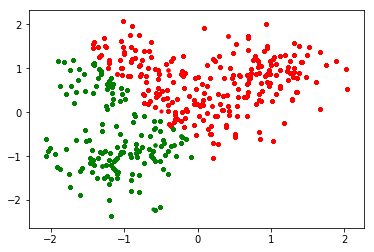

In [40]:
show_clusters(2)

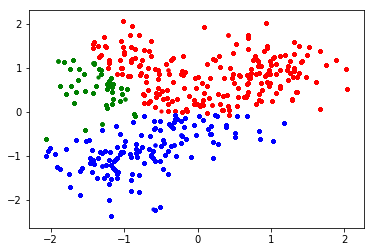

In [41]:
show_clusters(3)

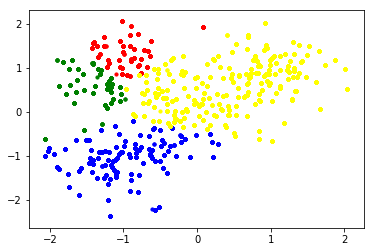

In [42]:
show_clusters(4)

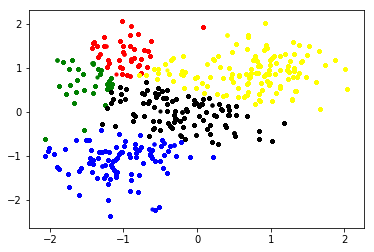

In [43]:
show_clusters(5)

2. (2) Реализуйте алгоритм DBSCAN, найдите параметры для кластеризации на 4 кластера.


In [12]:
def show_clusters2(e, m):
    clusters = dbscan(data.values.tolist(), e, m)
    x = [[] for i in range(len(clusters))]
    y = [[] for i in range(len(clusters))]
    colors = ['RED', 'GREEN', 'BLUE', 'YELLOW', 'BLACK', 'BLACK' ]
    
    for j in range(len(clusters) ):
        for i in clusters[j]:
            x[j].append(i[0])
            y[j].append(i[1])
            plt.scatter(x[j], y[j],  s=10 , c = colors[j])
          

epsilon = 1.15
elements near = 85
14.499999999999998 % - usless
4  - clusters


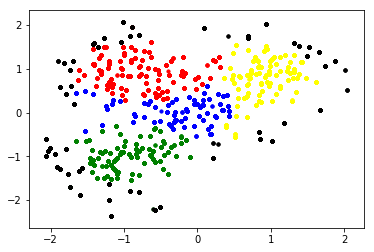

In [77]:
#dataset in list format
def dbscan(dataset, e, m):

    clusters = []
    usless = []
    cur_clust = 0
    
    # Преподготовка датасета - выделяем шум в отдельный кластер
    for point in dataset:
        near_pts = 0
        for point2 in dataset:
            if point_dist(point, point2) < e:
                near_pts += 1
        if near_pts < m:
            usless.append(point)
            
    
    for point in dataset:
        cluster = []
        if not(point in usless): # шум не может быть центром кластера
            for i in range(len(dataset)):
                if point_dist(point, dataset[i]) < e:
                    cluster.append(dataset[i])
            
            clusters.append(cluster)# Добавляем выделенный кластер
            
            for item in cluster: # Удаляем все элементы выделенного кластера 
                dataset.remove(item)   
    print(len(usless) / 400 * 100, '% - usless')
    print(len(clusters) - 1, ' - clusters') # -1 потому что выделяем шум в отдельный кластер
    clusters.append(usless)
    
    return clusters
eps = 1.15 # Среднее расстояние - 1.75, берем меньше
m = 85     # Из расчета: 4 кластера, 15% шума : (400 - 400*0.15) / 4 = 85 элементов в кластере
print('epsilon = {}\nelements near = {}'.format(eps , m) )
show_clusters2(eps, m)        
    

3. (3) Реализуйте алгоритм Agglomerative Clustering и выведите результаты кластеризации на [2,3,4,5] кластеров. Метрика на объединение - любая. Требование на связность тоже по желанию.


In [14]:
def show_clusters3(clusters):
    x = [[] for i in range(len(clusters))]
    y = [[] for i in range(len(clusters))]
    colors = ['RED', 'GREEN', 'BLUE', 'YELLOW', 'BLACK', 'BLACK']
    
    for j in range(len(clusters) ):
        for i in clusters[j]:
            x[j].append(i[0])
            y[j].append(i[1])
            plt.scatter(x[j], y[j],  s=10 , c = colors[j])
          

In [15]:
def class_dist(a, b):
    total_dist = 0
    for i in a:
        for j in b:
            total_dist += point_dist(i, j)
    return total_dist / (len(a) * len(b))        
            

In [33]:
def class_dist(a, b):
    max_dist = point_dist(a[0], b[0])
    for i in a:
        for j in b:
            if point_dist(i, j) > max_dist:
                max_dist = point_dist(i, j)
    return max_dist  


In [32]:
def agglClust(clust_num):
    clusters = [ [i] for i in data.values.tolist()]
    c_clust_num = len(clusters)
    while c_clust_num != clust_num:
        print('.', end = '')
        x = 0
        y = 1
        min_dist = class_dist(clusters[x], clusters[y])
        
        
        for i in range(c_clust_num):
            for j in range(i + 1, c_clust_num):
                if class_dist(clusters[i], clusters[j]) < min_dist:
                    x = i
                    y = j
                    min_dist = class_dist(clusters[i], clusters[j])
        
        clusters[x] += clusters[y]
        clusters.pop(y)
        c_clust_num -= 1
       
    print(' finished with {} clusters'.format(c_clust_num))
    return clusters        

.............................................................................................................................................................................................................................................................................................................................................................................................................. finished with 2 clusters


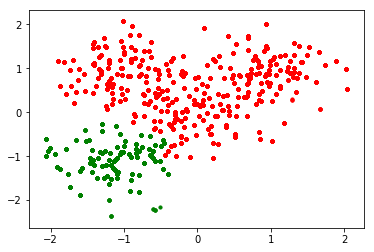

In [28]:
show_clusters3(agglClust(2))   

............................................................................................................................................................................................................................................................................................................................................................................................................. finished with 3 clusters


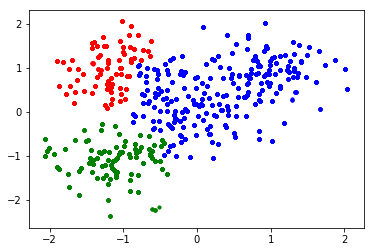

In [29]:
show_clusters3(agglClust(3))   

............................................................................................................................................................................................................................................................................................................................................................................................................ finished with 4 clusters


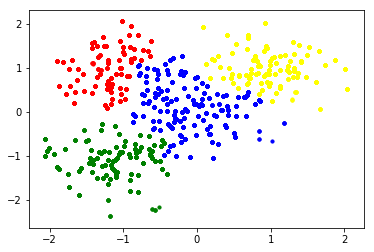

In [30]:
show_clusters3(agglClust(4))   

........................................................................................................................................................................................................................................................................................................................................................................................................... finished with 5 clusters


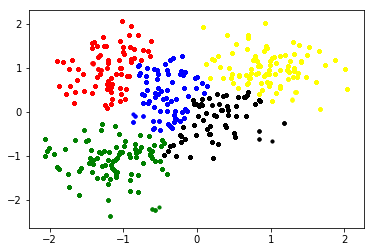

In [31]:
show_clusters3(agglClust(5))   

4. (2) Кластеризуйте данные из датасета cancer.csv (с нормировкой и без) на 2-10 кластеров методом k-means и посчитайте метрику purity по каждому разбиению.
